In [95]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [96]:
batting = pd.read_csv('Batting.csv')

print(batting.shape)

print(batting.tail())



(21927, 22)
        playerID  yearID  stint teamID lgID    G   AB   R   H  2B  ...  RBI  \
21922   zitoba01    2015      1    OAK   AL    3    0   0   0   0  ...    0   
21923  zobribe01    2015      1    OAK   AL   67  235  39  63  20  ...   33   
21924  zobribe01    2015      2    KCA   AL   59  232  37  66  16  ...   23   
21925  zuninmi01    2015      1    SEA   AL  112  350  28  61  11  ...   28   
21926   zychto01    2015      1    SEA   AL   13    0   0   0   0  ...    0   

       SB  CS  BB   SO  IBB  HBP  SH  SF  GIDP  
21922   0   0   0    0    0    0   0   0     0  
21923   1   1  33   26    2    0   0   3     5  
21924   2   3  29   30    1    1   0   2     3  
21925   0   1  21  132    0    5   8   2     6  
21926   0   0   0    0    0    0   0   0     0  

[5 rows x 22 columns]


<AxesSubplot:xlabel='AB', ylabel='H'>

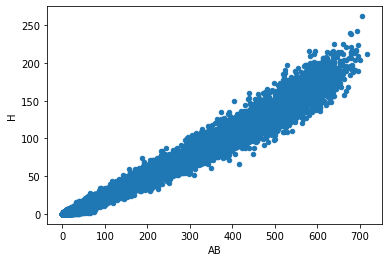

In [97]:
batting.plot.scatter("AB", "H")

In [98]:
x_train, x_test, y_train, y_test = train_test_split(batting.AB, batting.H, test_size = 0.2)
regr = LinearRegression()

In [99]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [100]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [101]:
y_test.head()

17253    126
9895     139
13544     49
15618     31
2587     133
Name: H, dtype: int64

In [102]:
preds

array([154.61069275, 132.448902  ,  47.6800524 , ...,  55.99072393,
       125.52334239,  -1.90695439])

In [103]:
residuals = preds - y_test

(array([1.000e+00, 0.000e+00, 1.400e+01, 5.100e+01, 1.050e+02, 2.856e+03,
        1.155e+03, 1.790e+02, 2.300e+01, 2.000e+00]),
 array([-68.88319583, -57.28914274, -45.69508965, -34.10103655,
        -22.50698346, -10.91293037,   0.68112273,  12.27517582,
         23.86922891,  35.46328201,  47.0573351 ]),
 <BarContainer object of 10 artists>)

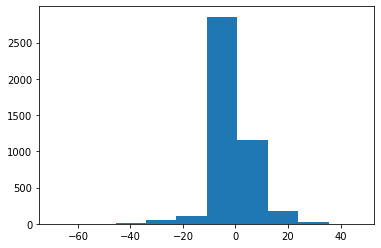

In [104]:
plt.hist(residuals)

In [105]:
mean_squared_error(y_test, preds) ** 0.5

7.052367448390153